### 1. Import and data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chess
from pandarallel import pandarallel

In [2]:
# Load clean dataset 
df = pd.read_csv("data/chess_games_clean.csv")
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN
0,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/3n1p1p/2b1p1pP/1B1pP1N1/1R1P1PN1/q1p3P1/2P...
1,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,4r3/1N1RP1pk/1R2K2p/8/1p2n3/rP4P1/8/8 w - - 7 41
2,Rated Blitz game,2024.01.01,KhusnutDudajanMag,O-Almeida,1-0,A00,2558,2685,blitz,Time forfeit,137,e3 g6 Nf3 Bg7 d4 f5 b3 Nf6 Bb2 O-O Nbd2 d6 c4 ...,2r2r2/1p2q1k1/3p2p1/1P6/p1PRPP2/7p/P3BQ2/6K1 w...
3,Rated Blitz game,2024.01.01,david_gomez,Marvel2,0-1,E81,2514,2351,blitz,Normal,98,d4 g6 e4 Bg7 c4 d6 Nc3 Nf6 f3 O-O Be3 c5 Nge2 ...,8/5p1p/p5p1/1k1bB3/4rP2/4K1P1/7P/8 w - - 1 41
4,Rated Blitz game,2024.01.01,che6ype1ka,ARDosina,1-0,D42,2582,2494,blitz,Normal,93,Nf3 e6 c4 d5 e3 Nf6 Nc3 c5 cxd5 Nxd5 d4 Nc6 Bd...,3R4/p1r3k1/1p2p3/4P1p1/2q1QpP1/P7/6P1/5K2 w - ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686168,Rated Blitz game,2024.12.31,hungzhao,Senkokay,1-0,B45,2676,2479,blitz,Normal,95,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e6 Ndb5 Bb4...,1R6/p3r1pp/6k1/2pR1p2/P4Kn1/2P5/6PP/8 w - - 3 41
1686169,Rated Blitz game,2024.12.31,The_Knight_Road,DanyMany,1-0,B01,2541,2437,blitz,Time forfeit,99,e4 d5 exd5 Qxd5 Nc3 Qd6 Nf3 Nf6 Bc4 Nc6 O-O a6...,8/4kp1B/4p3/2npP2p/p2N1P1K/P1P5/6P1/3b4 w - - ...
1686170,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,123,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,8/5p1k/3q1Ppp/3P4/3Qp1P1/7P/1R4B1/2r3K1 w - - ...
1686171,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,104,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,3r4/8/p1RBn1p1/P4k1p/7P/3K1PP1/8/8 w - - 4 41


### 2. Variable encoding
Convert `Result` to numeric for machine learning

In [3]:
result_map = {
    '0-1': 0,
    '1/2-1/2': 1,
    '1-0': 2
}

df['ResultNumeric'] = df['Result'].map(result_map)

Also convert the `EventType` to numeric for machine learning

In [4]:
event_type_map = {
    'blitz': 0, 
    'rapid': 1, 
    'classical': 2
}
df['EventTypeID'] = df['EventType'].map(event_type_map)
df.head(10)

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN,ResultNumeric,EventTypeID
0,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/3n1p1p/2b1p1pP/1B1pP1N1/1R1P1PN1/q1p3P1/2P...,0,0
1,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,4r3/1N1RP1pk/1R2K2p/8/1p2n3/rP4P1/8/8 w - - 7 41,2,0
2,Rated Blitz game,2024.01.01,KhusnutDudajanMag,O-Almeida,1-0,A00,2558,2685,blitz,Time forfeit,137,e3 g6 Nf3 Bg7 d4 f5 b3 Nf6 Bb2 O-O Nbd2 d6 c4 ...,2r2r2/1p2q1k1/3p2p1/1P6/p1PRPP2/7p/P3BQ2/6K1 w...,2,0
3,Rated Blitz game,2024.01.01,david_gomez,Marvel2,0-1,E81,2514,2351,blitz,Normal,98,d4 g6 e4 Bg7 c4 d6 Nc3 Nf6 f3 O-O Be3 c5 Nge2 ...,8/5p1p/p5p1/1k1bB3/4rP2/4K1P1/7P/8 w - - 1 41,0,0
4,Rated Blitz game,2024.01.01,che6ype1ka,ARDosina,1-0,D42,2582,2494,blitz,Normal,93,Nf3 e6 c4 d5 e3 Nf6 Nc3 c5 cxd5 Nxd5 d4 Nc6 Bd...,3R4/p1r3k1/1p2p3/4P1p1/2q1QpP1/P7/6P1/5K2 w - ...,2,0
5,Rated Blitz game,2024.01.01,BulletMND,Kumi,1-0,C00,2497,2529,blitz,Normal,91,e4 e6 d4 b6 Bd3 Bb7 Qe2 f5 exf5 Bxg2 Qh5+ g6 f...,r4k2/2R5/4p3/3pB3/K2P4/Pp6/1P6/8 w - - 1 41,2,0
6,Rated Blitz game,2024.01.01,firegus16,DylanT2010,1-0,D59,2543,2357,blitz,Normal,131,d4 Nf6 c4 e6 Nf3 d5 Nc3 Be7 Bg5 O-O e3 h6 Bh4 ...,2Br2k1/p7/1p2p2p/5pp1/8/P4P1P/1PR2PK1/8 w - - ...,2,0
7,Rated Blitz game,2024.01.01,legko2019,KOHA_2019,1/2-1/2,C10,2633,2439,blitz,Normal,87,e4 e6 d4 d5 Nc3 dxe4 Nxe4 Nd7 Nf3 Ngf6 Nxf6+ N...,8/8/2k5/5pb1/2PB4/5K2/8/8 w - - 0 41,1,0
8,Rated Blitz game,2024.01.01,Homer_J,rtahmass,1-0,A46,2480,2512,blitz,Normal,131,d4 Nf6 Nf3 e6 Bf4 d5 e3 Bd6 Nbd2 O-O Bd3 c5 c3...,7k/8/8/1p3RN1/8/8/5PP1/1r4K1 w - - 1 41,2,0
9,Rated Blitz game,2024.01.01,Odirovski,Mezo2013,1/2-1/2,D02,2554,2344,blitz,Normal,97,Nf3 d5 d4 Nf6 Bf4 g6 e3 Bg7 h3 O-O Be2 c5 c3 c...,3r1k2/p7/1pB1P1p1/5pP1/8/P2b2KP/4p3/4R3 w - - ...,1,0


### 2.5 Exploratory data analysis (EDA)

In [5]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 1,686,173
Total features: 15

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 42,170
Unique players (Black): 41,605
Unique ECO codes: 495


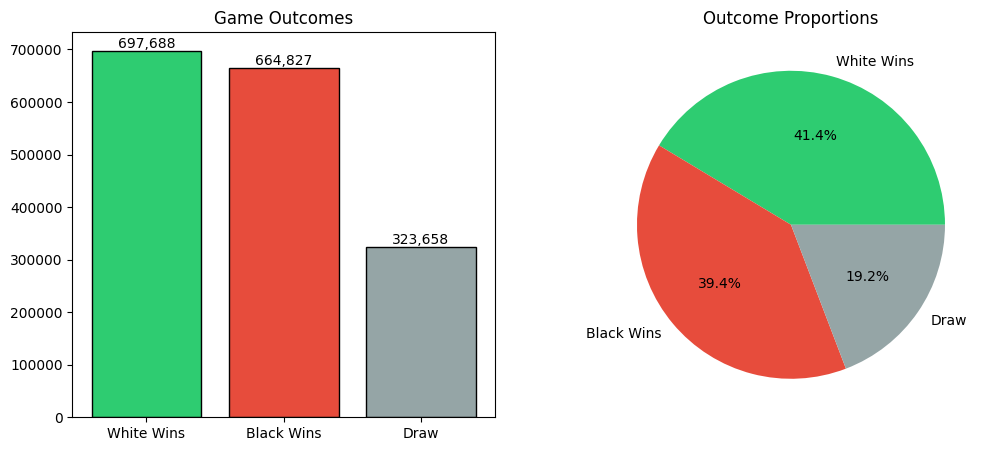

In [6]:
# Count results
counts = df['Result'].value_counts()
labels = ['White Wins', 'Black Wins', 'Draw']
colors = ['#2ecc71', '#e74c3c', '#95a5a6']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart 
axes[0].bar(labels, counts.values, color=colors, edgecolor='black')
axes[0].set_title('Game Outcomes')
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart 
axes[1].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Outcome Proportions')

plt.show()


#### Event type

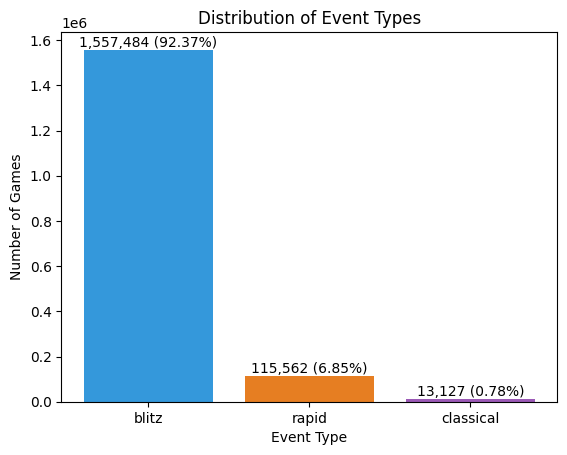

In [7]:
event_counts = df['EventType'].value_counts()
event_pcts = df['EventType'].value_counts(normalize=True) * 100

# Visualization
bars = plt.bar(event_counts.index, event_counts.values,
               color=['#3498db', '#e67e22', '#9b59b6'])

plt.xlabel('Event Type')
plt.ylabel('Number of Games')
plt.title('Distribution of Event Types')

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center", va="bottom"
    )

plt.show()


#### Elo rating 

/tmp/ipykernel_25392/2427650108.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['White Elo', 'Black Elo'])


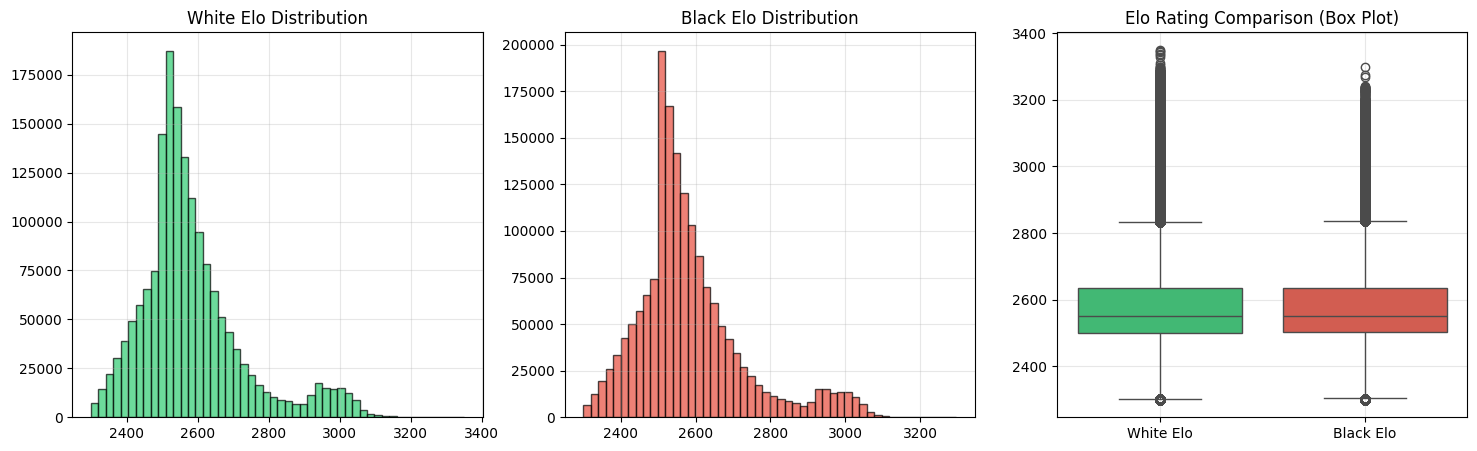

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for White Elo
axes[0].hist(df['WhiteElo'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('White Elo Distribution')
axes[0].grid(alpha=0.3)

# Histogram for Black Elo
axes[1].hist(df['BlackElo'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Black Elo Distribution')
axes[1].grid(alpha=0.3)

# Boxplot comparison
sns.boxplot(data=[df['WhiteElo'], df['BlackElo']],
            palette=['#2ecc71', '#e74c3c'],
            ax=axes[2])
axes[2].set_xticklabels(['White Elo', 'Black Elo'])
axes[2].set_title('Elo Rating Comparison (Box Plot)')
axes[2].grid(alpha=0.3)

plt.show()


#### ECO / Opening


Top 20 Most Common Openings:
   1. A00: 42,008 (2.49%)
   2. A45: 40,174 (2.38%)
   3. D02: 38,128 (2.26%)
   4. A05: 35,097 (2.08%)
   5. B00: 33,462 (1.98%)
   6. A40: 31,737 (1.88%)
   7. B12: 31,311 (1.86%)
   8. A04: 30,812 (1.83%)
   9. B40: 28,860 (1.71%)
  10. B06: 27,805 (1.65%)
  11. B01: 27,302 (1.62%)
  12. A46: 26,084 (1.55%)
  13. A01: 25,932 (1.54%)
  14. C00: 24,259 (1.44%)
  15. B10: 24,241 (1.44%)
  16. D00: 24,040 (1.43%)
  17. B90: 23,977 (1.42%)
  18. B22: 21,328 (1.26%)
  19. B23: 21,000 (1.25%)
  20. B30: 20,032 (1.19%)

Top 20 ECO codes coverage: 34.25% of all games


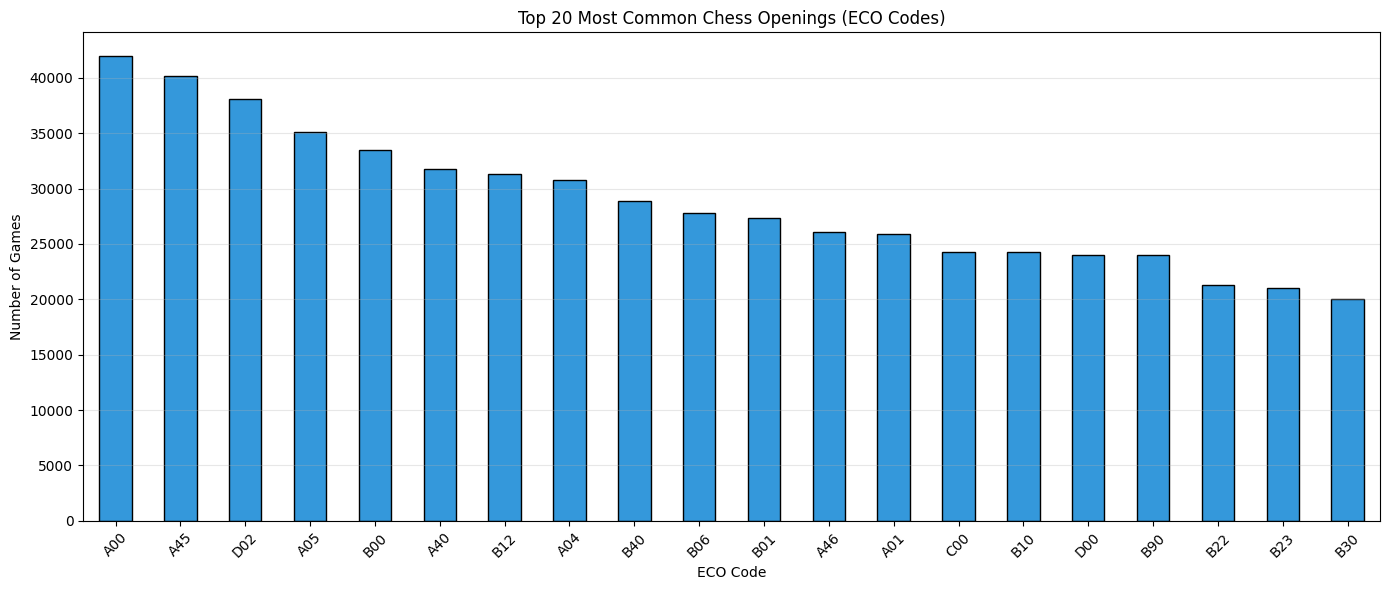

In [9]:
print(f"\nTop 20 Most Common Openings:")
top_20_display = df['ECO'].value_counts().head(20)
for i, (eco, count) in enumerate(top_20_display.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {eco}: {count:,} ({pct:.2f}%)")

# Coverage analysis
top_20_coverage = top_20_display.sum() / len(df) * 100
print(f"\nTop 20 ECO codes coverage: {top_20_coverage:.2f}% of all games")

# Visualization
plt.figure(figsize=(14, 6))
top_20_display.plot(kind='bar', color='#3498db', edgecolor='black')
plt.xlabel('ECO Code')
plt.ylabel('Number of Games')
plt.title('Top 20 Most Common Chess Openings (ECO Codes)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### Initial correlation

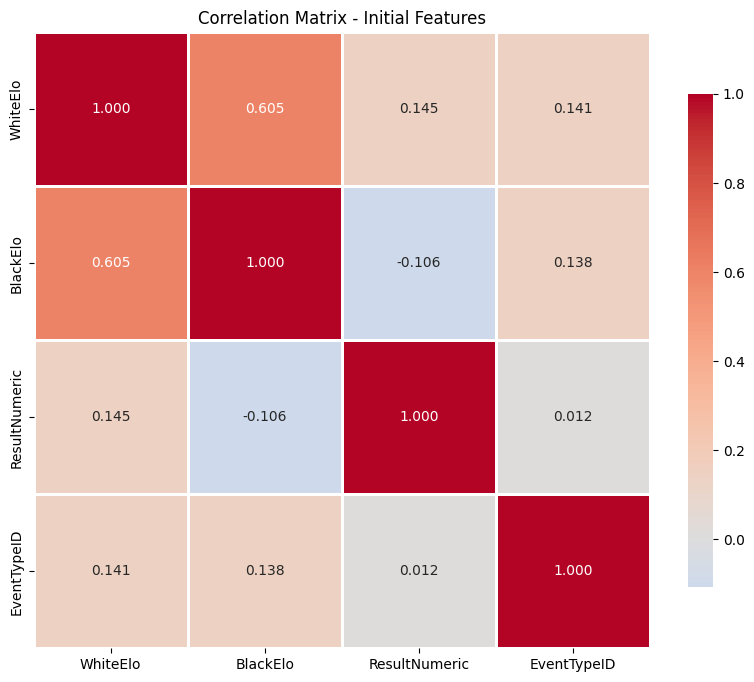

In [10]:
numeric_cols = ['WhiteElo', 'BlackElo', 'ResultNumeric', 'EventTypeID']
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Initial Features')

plt.show()

#### Result by event type

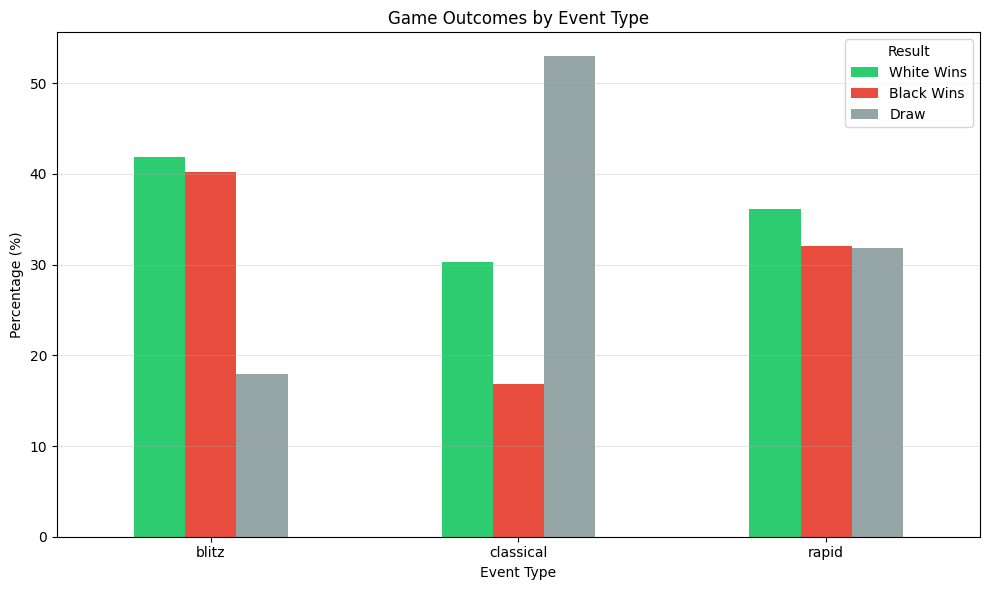

In [11]:
result_by_event = pd.crosstab(df['EventType'], df['Result'], normalize='index') * 100
result_by_event = result_by_event[['1-0', '0-1', '1/2-1/2']]
result_by_event.columns = ['White Wins', 'Black Wins', 'Draw']

# Visualization
result_by_event.plot(kind='bar', stacked=False, figsize=(10, 6),
                     color=['#2ecc71', '#e74c3c', '#95a5a6'])

plt.xlabel('Event Type')
plt.ylabel('Percentage (%)')
plt.title('Game Outcomes by Event Type')
plt.legend(title='Result', labels=['White Wins', 'Black Wins', 'Draw'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Basic feature engineering
create new numeric features for machine learning 

In [12]:
# Rating difference
df['RatingDiff'] = np.abs(df['WhiteElo'] - df['BlackElo'])

# Average rating
df['AvgRating'] = (df['WhiteElo'] + df['BlackElo']) / 2

# Indicator if White is higher rated (binary)
df['WhiteIsHigherRated'] = (df['WhiteElo'] > df['BlackElo']).astype(int)

# Rating advantage (signed - keeps direction)
df['WhiteRatingAdvantage'] = df['WhiteElo'] - df['BlackElo']
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage
0,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/3n1p1p/2b1p1pP/1B1pP1N1/1R1P1PN1/q1p3P1/2P...,0,0,130,2469.0,0,-130
1,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,4r3/1N1RP1pk/1R2K2p/8/1p2n3/rP4P1/8/8 w - - 7 41,2,0,357,2573.5,1,357
2,Rated Blitz game,2024.01.01,KhusnutDudajanMag,O-Almeida,1-0,A00,2558,2685,blitz,Time forfeit,137,e3 g6 Nf3 Bg7 d4 f5 b3 Nf6 Bb2 O-O Nbd2 d6 c4 ...,2r2r2/1p2q1k1/3p2p1/1P6/p1PRPP2/7p/P3BQ2/6K1 w...,2,0,127,2621.5,0,-127
3,Rated Blitz game,2024.01.01,david_gomez,Marvel2,0-1,E81,2514,2351,blitz,Normal,98,d4 g6 e4 Bg7 c4 d6 Nc3 Nf6 f3 O-O Be3 c5 Nge2 ...,8/5p1p/p5p1/1k1bB3/4rP2/4K1P1/7P/8 w - - 1 41,0,0,163,2432.5,1,163
4,Rated Blitz game,2024.01.01,che6ype1ka,ARDosina,1-0,D42,2582,2494,blitz,Normal,93,Nf3 e6 c4 d5 e3 Nf6 Nc3 c5 cxd5 Nxd5 d4 Nc6 Bd...,3R4/p1r3k1/1p2p3/4P1p1/2q1QpP1/P7/6P1/5K2 w - ...,2,0,88,2538.0,1,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686168,Rated Blitz game,2024.12.31,hungzhao,Senkokay,1-0,B45,2676,2479,blitz,Normal,95,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e6 Ndb5 Bb4...,1R6/p3r1pp/6k1/2pR1p2/P4Kn1/2P5/6PP/8 w - - 3 41,2,0,197,2577.5,1,197
1686169,Rated Blitz game,2024.12.31,The_Knight_Road,DanyMany,1-0,B01,2541,2437,blitz,Time forfeit,99,e4 d5 exd5 Qxd5 Nc3 Qd6 Nf3 Nf6 Bc4 Nc6 O-O a6...,8/4kp1B/4p3/2npP2p/p2N1P1K/P1P5/6P1/3b4 w - - ...,2,0,104,2489.0,1,104
1686170,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,123,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,8/5p1k/3q1Ppp/3P4/3Qp1P1/7P/1R4B1/2r3K1 w - - ...,2,0,88,2493.0,1,88
1686171,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,104,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,3r4/8/p1RBn1p1/P4k1p/7P/3K1PP1/8/8 w - - 4 41,0,0,26,2570.0,1,26


### 4. Opening encoding (ECO)
Since there is almost 500 different ECO, we decide to just use the top 20 most use while the rest will be others.

In [13]:
# Get top 20 ECO codes
top_20_eco = df['ECO'].value_counts().head(20).index.tolist()

# Group less frequent ECO codes into 'Other'
def group_eco(code):
    if code in top_20_eco:
        return code
    return 'Other'

df['ECOGroup'] = df['ECO'].apply(group_eco)
eco_categories = ['Other'] + top_20_eco
df['ECOID'] = df['ECOGroup'].apply(lambda x: eco_categories.index(x))
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,...,FirstNMoves,BoardStateAtMoveN,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOGroup,ECOID
0,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,...,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/3n1p1p/2b1p1pP/1B1pP1N1/1R1P1PN1/q1p3P1/2P...,0,0,130,2469.0,0,-130,Other,0
1,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,...,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,4r3/1N1RP1pk/1R2K2p/8/1p2n3/rP4P1/8/8 w - - 7 41,2,0,357,2573.5,1,357,Other,0
2,Rated Blitz game,2024.01.01,KhusnutDudajanMag,O-Almeida,1-0,A00,2558,2685,blitz,Time forfeit,...,e3 g6 Nf3 Bg7 d4 f5 b3 Nf6 Bb2 O-O Nbd2 d6 c4 ...,2r2r2/1p2q1k1/3p2p1/1P6/p1PRPP2/7p/P3BQ2/6K1 w...,2,0,127,2621.5,0,-127,A00,1
3,Rated Blitz game,2024.01.01,david_gomez,Marvel2,0-1,E81,2514,2351,blitz,Normal,...,d4 g6 e4 Bg7 c4 d6 Nc3 Nf6 f3 O-O Be3 c5 Nge2 ...,8/5p1p/p5p1/1k1bB3/4rP2/4K1P1/7P/8 w - - 1 41,0,0,163,2432.5,1,163,Other,0
4,Rated Blitz game,2024.01.01,che6ype1ka,ARDosina,1-0,D42,2582,2494,blitz,Normal,...,Nf3 e6 c4 d5 e3 Nf6 Nc3 c5 cxd5 Nxd5 d4 Nc6 Bd...,3R4/p1r3k1/1p2p3/4P1p1/2q1QpP1/P7/6P1/5K2 w - ...,2,0,88,2538.0,1,88,Other,0


### 5. FirstNMoves feature engineer

In [14]:
pandarallel.initialize(nb_workers=12, progress_bar=True)

def extract_smart_early_features(moves_str):
    """
    Extract chess-intelligent features from moves provided.
    """
    # Default values if no moves
    default_features = {
        # Material (inspired by full-game: material matters)
        'w_material_early': 39, 'b_material_early': 39, 'material_diff_early': 0,
        
        # Captures (full-game top feature: 19% importance)
        'w_captures_early': 0, 'b_captures_early': 0, 'capture_diff_early': 0,
        
        # Aggression (full-game #2: 18% importance)
        'w_aggression_early': 0.0, 'b_aggression_early': 0.0, 'aggression_diff_early': 0.0,
        
        # Center control (chess fundamentals)
        'w_center_control': 0, 'b_center_control': 0, 'center_diff': 0,
        
        # Development (pieces off starting squares)
        'w_development': 0, 'b_development': 0, 'development_diff': 0,
        
        # King safety
        'w_castled_early': 0, 'b_castled_early': 0,
        
        # Tactical activity (checks in early game)
        'early_checks': 0, 'w_checks_early': 0, 'b_checks_early': 0,
        
        # Position quality
        'w_piece_activity': 0, 'b_piece_activity': 0,
    }
    
    if pd.isna(moves_str) or moves_str == '':
        return pd.Series(default_features)
    
    # Play through first 20 half-moves
    board = chess.Board()
    moves = moves_str.split()
    
    # Track captures and checks during first 20 moves
    w_captures = 0
    b_captures = 0
    w_checks = 0
    b_checks = 0
    
    for i, move_san in enumerate(moves):
        try:
            # Check for capture and check BEFORE making move
            if 'x' in move_san:
                if i % 2 == 0:
                    w_captures += 1
                else:
                    b_captures += 1
            
            if '+' in move_san or '#' in move_san:
                if i % 2 == 0:
                    w_checks += 1
                else:
                    b_checks += 1
            
            board.push_san(move_san)
        except:
            break
    
    features = {}
    
    # 1. Material count at position 
    piece_values = {
        chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3,
        chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0
    }
    
    w_material = 0
    b_material = 0
    
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            value = piece_values[piece.piece_type]
            if piece.color == chess.WHITE:
                w_material += value
            else:
                b_material += value
    
    features['w_material_early'] = w_material
    features['b_material_early'] = b_material
    features['material_diff_early'] = w_material - b_material
    
    # 2. Captures (full-game capture_diff - 19% importance!)
    features['w_captures_early'] = w_captures
    features['b_captures_early'] = b_captures
    features['capture_diff_early'] = w_captures - b_captures
    
    # 3. Aggression score (full-game - 18% importance!)
    moves_played = len([m for m in moves])
    w_moves = (moves_played + 1) // 2
    b_moves = moves_played // 2
    
    features['w_aggression_early'] = (w_captures + w_checks) / max(1, w_moves)
    features['b_aggression_early'] = (b_captures + b_checks) / max(1, b_moves)
    features['aggression_diff_early'] = features['w_aggression_early'] - features['b_aggression_early']
    
    # 4. Center control (e4, e5, d4, d5)
    center_squares = [chess.E4, chess.E5, chess.D4, chess.D5]
    features['w_center_control'] = sum(1 for sq in center_squares 
                                       if board.is_attacked_by(chess.WHITE, sq))
    features['b_center_control'] = sum(1 for sq in center_squares 
                                       if board.is_attacked_by(chess.BLACK, sq))
    features['center_diff'] = features['w_center_control'] - features['b_center_control']
    
    # 5. Development (pieces off back rank)
    w_back_rank = [chess.A1, chess.B1, chess.C1, chess.D1, chess.E1, chess.F1, chess.G1, chess.H1]
    b_back_rank = [chess.A8, chess.B8, chess.C8, chess.D8, chess.E8, chess.F8, chess.G8, chess.H8]
    
    # Count empty squares or king-only squares 
    features['w_development'] = sum(1 for sq in w_back_rank 
                                    if board.piece_at(sq) is None or 
                                    (board.piece_at(sq) and board.piece_at(sq).piece_type == chess.KING))
    
    features['b_development'] = sum(1 for sq in b_back_rank 
                                    if board.piece_at(sq) is None or 
                                    (board.piece_at(sq) and board.piece_at(sq).piece_type == chess.KING))
    
    features['development_diff'] = features['w_development'] - features['b_development']
    
    # 6. King safety (castled)
    w_king_sq = board.king(chess.WHITE)
    b_king_sq = board.king(chess.BLACK)
    
    features['w_castled_early'] = 1 if w_king_sq in [chess.G1, chess.C1] else 0
    features['b_castled_early'] = 1 if b_king_sq in [chess.G8, chess.C8] else 0
    
    # 7. Checks (tactical pressure)
    features['w_checks_early'] = w_checks
    features['b_checks_early'] = b_checks
    features['early_checks'] = w_checks + b_checks
    
    # 8. Piece activity (controlled squares)
    features['w_piece_activity'] = sum(1 for sq in chess.SQUARES 
                                       if board.is_attacked_by(chess.WHITE, sq))
    features['b_piece_activity'] = sum(1 for sq in chess.SQUARES 
                                       if board.is_attacked_by(chess.BLACK, sq))
    
    return pd.Series(features)

early_features_df = df['FirstNMoves'].parallel_apply(extract_smart_early_features)
early_features_df.head()

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,w_material_early,b_material_early,material_diff_early,w_captures_early,b_captures_early,capture_diff_early,w_aggression_early,b_aggression_early,aggression_diff_early,w_center_control,...,w_development,b_development,development_diff,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity
0,20.0,21.0,-1.0,6.0,5.0,1.0,0.150,0.125,0.025,3.0,...,8.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0,33.0
1,16.0,16.0,0.0,9.0,9.0,0.0,0.225,0.250,-0.025,3.0,...,8.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,27.0,27.0
2,22.0,24.0,-2.0,7.0,7.0,0.0,0.175,0.175,0.000,4.0,...,8.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,30.0,32.0
3,6.0,12.0,-6.0,9.0,11.0,-2.0,0.225,0.325,-0.100,3.0,...,8.0,8.0,0.0,0.0,0.0,0.0,2.0,2.0,21.0,23.0
4,18.0,19.0,-1.0,8.0,9.0,-1.0,0.250,0.275,-0.025,3.0,...,8.0,7.0,1.0,0.0,0.0,2.0,2.0,4.0,35.0,41.0


In [15]:
df = pd.concat([df.reset_index(drop=True), early_features_df.reset_index(drop=True)], axis=1)

Additional features

In [16]:
df['both_castled_early'] = ((df['w_castled_early'] == 1) & (df['b_castled_early'] == 1)).astype(int)
df['total_captures_early'] = df['w_captures_early'] + df['b_captures_early']
df['activity_diff'] = df['w_piece_activity'] - df['b_piece_activity']

### 6. Remove unneeded columns

In [17]:
# 'Event', 'EventType', 'Result','ECO' and 'ECOGroup' can be drop because there is 'EventTypeID', 'ECOID', 'ResultNumeric'
# 'Date' is not used for the data since it is just data about time 
# Same with 'White' and 'Black', these are just the username so the data is not used
### 6. Remove unneeded columns
df = df.drop(['Event', 'Date', 'White', 'Black', 'Result', 'ECO', 'ECOGroup', 'EventType', 
              'FirstNMoves', 'Termination', 'BoardStateAtMoveN', 'NumMoves' ], axis=1)

### 7. Exported featured data
Final check before export into csv

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686173 entries, 0 to 1686172
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   WhiteElo               1686173 non-null  int64  
 1   BlackElo               1686173 non-null  int64  
 2   ResultNumeric          1686173 non-null  int64  
 3   EventTypeID            1686173 non-null  int64  
 4   RatingDiff             1686173 non-null  int64  
 5   AvgRating              1686173 non-null  float64
 6   WhiteIsHigherRated     1686173 non-null  int64  
 7   WhiteRatingAdvantage   1686173 non-null  int64  
 8   ECOID                  1686173 non-null  int64  
 9   w_material_early       1686173 non-null  float64
 10  b_material_early       1686173 non-null  float64
 11  material_diff_early    1686173 non-null  float64
 12  w_captures_early       1686173 non-null  float64
 13  b_captures_early       1686173 non-null  float64
 14  capture_diff_early

In [19]:
df.isnull().sum()

WhiteElo                 0
BlackElo                 0
ResultNumeric            0
EventTypeID              0
RatingDiff               0
AvgRating                0
WhiteIsHigherRated       0
WhiteRatingAdvantage     0
ECOID                    0
w_material_early         0
b_material_early         0
material_diff_early      0
w_captures_early         0
b_captures_early         0
capture_diff_early       0
w_aggression_early       0
b_aggression_early       0
aggression_diff_early    0
w_center_control         0
b_center_control         0
center_diff              0
w_development            0
b_development            0
development_diff         0
w_castled_early          0
b_castled_early          0
w_checks_early           0
b_checks_early           0
early_checks             0
w_piece_activity         0
b_piece_activity         0
both_castled_early       0
total_captures_early     0
activity_diff            0
dtype: int64

In [20]:
df.to_csv('data/chess_games_feature.csv', index=False)